### Income Measures from Census

Typically annual data such as from the ACS and CPS ASEC

In [2]:
import sys
sys.path.append('../src')

import uschartbook.config

from uschartbook.config import *
from uschartbook.utils import *

Total percent change in personal income, 2019 vs 2018:  6.89%
                              ContribP  ContribM  Contrib
Name                                                     
Total                             1.36      5.46     6.89
Earnings                          1.06      2.56     3.65
Unemployment compensation         0.01      0.01     0.02
Workers' compensation             0.02      0.02     0.04
Social Security                   0.15      0.30     0.45
Supplemental Security Income     -0.02      0.01    -0.01
Public assistance                -0.00      0.01     0.01
Veterans' benefits                0.01      0.07     0.09
Survivor benefits                 0.01     -0.02    -0.01
Disability benefits               0.03      0.01     0.04
Retirement income                 0.31      0.24     0.57
Property income                   0.32      1.54     1.95
Educational assistance            0.01     -0.01     0.00
Child support                    -0.01      0.00    -0.01
Alimony   

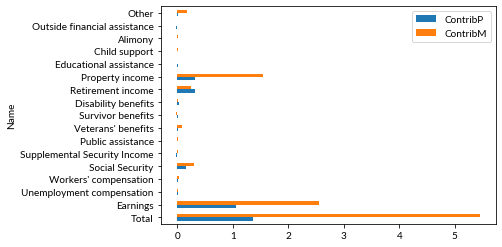

In [3]:
# Table made manually from combining PINC-09 from 2019 and 2018
df = (pd.read_csv('../data/pinc-09-2019-2018.csv', index_col='Name')
        .drop(['Wages and salary', 'Nonfarm self-employment']))
df['Mean2018'] = df['Mean2018'] * (376.5/369.8)
for year in [2019, 2018]:
    df[f'Total{year}'] = df[f'Number{year}'] * df[f'Mean{year}']
    
df['PctCh'] = ((df['Total2019'] / df['Total2018']) - 1) * 100
df['LvlCh'] = df['Total2019'] - df['Total2018']
df['LvlChP'] = (df['Number2019'] * df['Mean2018']) - df['Total2018']
df['LvlChM'] = (df['Number2018'] * df['Mean2019']) - df['Total2018']
df['ContribP'] = (df['LvlChP'] / df.loc['Total', 'LvlCh']) * df.loc['Total', 'PctCh']
df['ContribM'] = (df['LvlChM'] / df.loc['Total', 'LvlCh']) * df.loc['Total', 'PctCh']
df['Contrib'] = (df['LvlCh'] / df.loc['Total', 'LvlCh']) * df.loc['Total', 'PctCh']
print('Total percent change in personal income, 2019 vs 2018: ', f"{df.loc['Total', 'PctCh']:.2f}%")
print(df[['ContribP', 'ContribM', 'Contrib']].round(2))
df[['ContribP', 'ContribM']].plot(kind='barh');

In [11]:
cats = ['Earnings', 'Property income', 'Retirement income', 'Social Security']

df.loc[cats, ['ContribP', 'ContribM']].to_csv(data_dir / 'pinc.csv', index_label='Name')